## Objective:

 - 1.Create a master file for columns A, B and C (chromosome, position and ID) and this master should include unique combinations of A, B, C from ALL samples in that folder
 - 2.Identify the count of RSID (column C with RSIDxxxx) and blanks (“.” In column C) for each sample.
 - 3.Provide the number of rows with an RSID (column C and typically starts with RSxxxxxx) for each Chromosome (column A that starts with Chr1, 2.. etc.)
 - 4.For each unique RSID (columns C from the master data that is created in step a.), give the count of the number of samples that have that unique RSID. We should be able to execute this file

## Given sample data
- Sample VCF files.zip

Sample details

|No.|File name| No. Columns|No. Rows| Size   |Size in MB |
|---:|:-------------|:-----------|:-----------|:-------|:---------
| 1 |SAM12652700.haplotypecaller.hardfiltered.vcf.txt|10|652472|130,116,550|15 MB
| 2 |SAM12652709.haplotypecaller.hardfiltered.vcf.txt|10|324872|65,976,573|63 MB
| 3 |SAM12652716.haplotypecaller.hardfiltered.vcf.txt|10|334670|66,320,828|64 MB
| 4 |SAM17751403.haplotypecaller.hardfiltered.vcf.txt|10|300866|61,357,051|59 MB
| 5 |SAM17751411.haplotypecaller.hardfiltered.vcf.txt|10|390217|76,951,534|74 MB
| 6 |SAM17856303.haplotypecaller.hardfiltered.vcf.txt|10|907458|178,174,219|170 MB
| 7 |SAM20106732.haplotypecaller.hardfiltered.vcf.txt|10|30492 |6,193,820 |6.0 MB
| 8 |SAM20106765.haplotypecaller.hardfiltered.vcf.txt|10|58841 |10,913,655|11 MB

- The Output of a file is written in VCF (variant call format), It contains tab separated columns 
- The Input data will be in a text file containing tab separated columns.
- A human being has 24 chromosomes. In a file you have all 23(1..23) chromosome apart some other random chromosome i.e X and Y, chr1_KI270706v1_random, etc
- Each  chromosome has a multiple position(POS).
- RSID is a unique number which is a combination of chromosome and the position.
- If this chromosome and Position have some importance then they will assign an RSID if now then they will just give .  or blanks

- Each file has 10 columns name with maximum length.

|No.|Columns name|SAM12652700|SAM12652709|SAM12652716|SAM17751403|SAM17751411|SAM17856303|SAM20106732|SAM20106765|Storage size|Sample|
|---:|:---:|:---:|:---------:|:-------:|:--------:|:-------:|:--------:|:--------:|:------:|:-----:|:-----
|1|CHROM|23|23|23|23|23|23|23|23|VARCHAR(23)|chr1_KI270706v1_random|
|2|POS|9|9|9|9|9|9|9|9|INTEGER|774758|
|3|ID|117|99|92|92|99|108|80|82|VARCHAR(117)|rs62635285|
|4|REF|179|179|145|148|133|202|107|87|VARCHAR(202)|T| 
|5|ALT|151|125|139|80|80|80|33|46|VARCHAR(151)|TTTTAACAAG|
|6|QUAL|8|8|8|8|8|8|8|7|FLOAT|43.6|
|7|FILTER|6|6|6|6|6|6|6|6|VARCHAR(7)|PASS|
|8|INFO|180|179|180|179|179|180|179|179|VARCHAR(180)|AC=1;AF=0.500;AN=2;BaseQRankSum=1.940;DP=13;ExcessHet=3.0103;FS=0.000;MLEAC=1;MLEAF=0.500;MQ=33.61;MQRankSum=2.395;QD=3.35;ReadPosRankSum=1.382;SOR=1.508|
|9|FORMAT|14|14|14|14|14|14|14|14|VARCHAR(14)|GT:AD:DP:GQ:PL|
|10|SAM..|53|55|55|48|50|51|47|48|VARCHAR(55)| 0/1:11,2:13:51:51,0,456|


## Building Platform
- AWS account with MySQL database.
- Schema for Tables

- Schema for Tables
```
CREATE TABLE TABLE_NAME (
                          `CHROM` VARCHAR(23),
                          `POS` INTEGER,
                          `ID` VARCHAR(117),
                          `REF` VARCHAR(202),
                          `ALT` VARCHAR(151),
                          `QUAL` FLOAT,
                          `FILTER` VARCHAR(7),
                          `INFO` VARCHAR(180),
                          `FORMAT` VARCHAR(14),
                          `SAM12652700` VARCHAR(55)
                        );
```
- Enabling LOCAL data loading.
```
mysql --local-infile=1 -u root -p 
SET GLOBAL local_infile=1;
LOAD DATA LOCAL INFILE '/Path/to/file'   INTO TABLE table-name IGNORE 1 ROWS;
```

- Sending file from local to remote machine.
```
scp -i "XXX-ec2.pem"/Path/to/SAM* ubuntu@ec2-XX-XX-XXX-XX.XX-XX-1.compute.amazonaws.com:/home/ubuntu
```

## - AWS Account details

```
- sudo df -Th .
Filesystem     Type  Size  Used Avail Use% Mounted on
/dev/root      ext4   29G  3.5G   26G  12% /
```

## Schema for Tables 


1. SAM12652700.haplotypecaller.hardfiltered.vcf.csv 
- SIZE = 15 MB
- No. ROWS = 652472
- No. COLUMNS = 10
```
CREATE TABLE SAM2700 (
  `CHROM` VARCHAR(24),
  `POS` INTEGER,
  `ID` VARCHAR(120),
  `REF` VARCHAR(205),
  `ALT` VARCHAR(160),
  `QUAL` FLOAT,
  `FILTER` VARCHAR(7),
  `INFO` VARCHAR(190),
  `FORMAT` VARCHAR(14),
  `SAM12652700` VARCHAR(58)
);

LOAD DATA LOCAL INFILE '/home/ubuntu/SAM12652700.haplotypecaller.hardfiltered.vcf.csv'   INTO TABLE SAM2700 IGNORE 1 ROWS;

Query OK, 652471 rows affected (10.48 sec)
Records: 652471  Deleted: 0  Skipped: 0  Warnings: 0

```

2. SAM12652709.haplotypecaller.hardfiltered.vcf.txt

- SIZE = 63 MB
- No. ROWS = 324872	
- No. COLUMNS = 10

```
CREATE TABLE SAM2709 (
  `CHROM` VARCHAR(24),
  `POS` INTEGER,
  `ID` VARCHAR(120),
  `REF` VARCHAR(205),
  `ALT` VARCHAR(160),
  `QUAL` FLOAT,
  `FILTER` VARCHAR(7),
  `INFO` VARCHAR(190),
  `FORMAT` VARCHAR(14),
  `SAM12652709` VARCHAR(58)
);

LOAD DATA LOCAL INFILE '/home/ubuntu/SAM12652709.haplotypecaller.hardfiltered.vcf.txt'   INTO TABLE SAM2709  IGNORE 1 ROWS;

Query OK, 324871 rows affected (3.70 sec)
Records: 324871  Deleted: 0  Skipped: 0  Warnings: 0
```

3. SAM12652716.haplotypecaller.hardfiltered.vcf.txt
- SIZE = 64 MB
- No. ROWS = 334670	
- No. COLUMNS = 10

```
CREATE TABLE SAM2716 (
  `CHROM` VARCHAR(24),
  `POS` INTEGER,
  `ID` VARCHAR(120),
  `REF` VARCHAR(205),
  `ALT` VARCHAR(160),
  `QUAL` FLOAT,
  `FILTER` VARCHAR(7),
  `INFO` VARCHAR(190),
  `FORMAT` VARCHAR(14),
  `SAM12652716` VARCHAR(58)
);

LOAD DATA LOCAL INFILE '/home/ubuntu/SAM12652716.haplotypecaller.hardfiltered.vcf.txt'   INTO TABLE SAM2716  IGNORE 1 ROWS;

Query OK, 334669 rows affected (3.84 sec)
Records: 334669  Deleted: 0  Skipped: 0  Warnings: 0

```


4. SAM17751403.haplotypecaller.hardfiltered.vcf.txt
- SIZE = 59 MB
- No. ROWS = 300866
- No. COLUMNS = 10
```
CREATE TABLE SAM1403 (
  `CHROM` VARCHAR(24),
  `POS` INTEGER,
  `ID` VARCHAR(120),
  `REF` VARCHAR(205),
  `ALT` VARCHAR(160),
  `QUAL` FLOAT,
  `FILTER` VARCHAR(7),
  `INFO` VARCHAR(190),
  `FORMAT` VARCHAR(14),
  `SAM12651403` VARCHAR(58)
);


LOAD DATA LOCAL INFILE '/home/ubuntu/SAM17751403.haplotypecaller.hardfiltered.vcf.txt'   INTO TABLE SAM1403  IGNORE 1 ROWS;

Query OK, 300865 rows affected (3.48 sec)
Records: 300865  Deleted: 0  Skipped: 0  Warnings: 0
```

5. SAM17751411.haplotypecaller.hardfiltered.vcf.txt
- SIZE = 74 MB
- No. ROWS = 390217	
- No. COLUMNS = 10

```
CREATE TABLE SAM1411 (
  `CHROM` VARCHAR(24),
  `POS` INTEGER,
  `ID` VARCHAR(120),
  `REF` VARCHAR(205),
  `ALT` VARCHAR(160),
  `QUAL` FLOAT,
  `FILTER` VARCHAR(7),
  `INFO` VARCHAR(190),
  `FORMAT` VARCHAR(14),
  `SAM12651411` VARCHAR(58)
);


LOAD DATA LOCAL INFILE '/home/ubuntu/SAM17751411.haplotypecaller.hardfiltered.vcf.txt'   INTO TABLE SAM1411 IGNORE 1 ROWS;

Query OK, 390216 rows affected (4.95 sec)
Records: 390216  Deleted: 0  Skipped: 0  Warnings: 0
```

6. SAM17856303.haplotypecaller.hardfiltered.vcf.txt
- SIZE = 170 MB
- No. ROWS = 907458
- No. COLUMNS = 10

```
CREATE TABLE SAM6303 (
  `CHROM` VARCHAR(24),
  `POS` INTEGER,
  `ID` VARCHAR(120),
  `REF` VARCHAR(205),
  `ALT` VARCHAR(160),
  `QUAL` FLOAT,
  `FILTER` VARCHAR(7),
  `INFO` VARCHAR(190),
  `FORMAT` VARCHAR(14),
  `SAM12656303` VARCHAR(58)
);


LOAD DATA LOCAL INFILE '/home/ubuntu/SAM17856303.haplotypecaller.hardfiltered.vcf.txt'   INTO TABLE SAM6303  IGNORE 1 ROWS ;

Query OK, 907457 rows affected (14.18 sec)
Records: 907457  Deleted: 0  Skipped: 0  Warnings: 0
```

7. SAM20106732.haplotypecaller.hardfiltered.vcf.txt
- SIZE = 6.0 MB
- No. ROWS = 30492	
- No. COLUMNS = 10
```
CREATE TABLE SAM6732 (
  `CHROM` VARCHAR(24),
  `POS` INTEGER,
  `ID` VARCHAR(120),
  `REF` VARCHAR(205),
  `ALT` VARCHAR(160),
  `QUAL` FLOAT,
  `FILTER` VARCHAR(7),
  `INFO` VARCHAR(190),
  `FORMAT` VARCHAR(14),
  `SAM12656732` VARCHAR(58)
);


LOAD DATA LOCAL INFILE '/home/ubuntu/SAM20106732.haplotypecaller.hardfiltered.vcf.txt'   INTO TABLE SAM6732  IGNORE 1 ROWS;
```



8. SAM20106765.haplotypecaller.hardfiltered.vcf.txt
- SIZE = 11 MB
- No. ROWS = 58841
- No. COLUMNS = 10
```
CREATE TABLE SAM6765 (
  `CHROM` VARCHAR(24),
  `POS` INTEGER,
  `ID` VARCHAR(120),
  `REF` VARCHAR(205),
  `ALT` VARCHAR(160),
  `QUAL` FLOAT,
  `FILTER` VARCHAR(7),
  `INFO` VARCHAR(190),
  `FORMAT` VARCHAR(14),
  `SAM12656765` VARCHAR(58)
);

LOAD DATA LOCAL INFILE '/home/ubuntu/SAM20106765.haplotypecaller.hardfiltered.vcf.txt'   INTO TABLE SAM6765  IGNORE 1 ROWS;

Query OK, 58840 rows affected (0.76 sec)
Records: 58840  Deleted: 0  Skipped: 0  Warnings: 0
```


* Creating a master_table
```
CREATE TABLE MASTER_DATA (
  `CHROM` VARCHAR(24),
  `POS` INTEGER,
  `ID` VARCHAR(120),
  `REF` VARCHAR(205),
  `ALT` VARCHAR(160),
  `QUAL` FLOAT,
  `FILTER` VARCHAR(7),
  `INFO` VARCHAR(190),
  `FORMAT` VARCHAR(14),
  `SAM12652700` VARCHAR(58)
);

LOAD DATA LOCAL INFILE '/home/ubuntu/SAM12652700.haplotypecaller.hardfiltered.vcf.csv'   INTO TABLE MASTER_DATA IGNORE 1 ROWS;

LOAD DATA LOCAL INFILE '/home/ubuntu/SAM12652709.haplotypecaller.hardfiltered.vcf.txt'   INTO TABLE MASTER_DATA  IGNORE 1 ROWS;  
  
LOAD DATA LOCAL INFILE '/home/ubuntu/SAM12652716.haplotypecaller.hardfiltered.vcf.txt'   INTO TABLE MASTER_DATA  IGNORE 1 ROWS;  
  
LOAD DATA LOCAL INFILE '/home/ubuntu/SAM17751403.haplotypecaller.hardfiltered.vcf.txt'   INTO TABLE MASTER_DATA  IGNORE 1 ROWS; 

LOAD DATA LOCAL INFILE '/home/ubuntu/SAM17751411.haplotypecaller.hardfiltered.vcf.txt'   INTO TABLE MASTER_DATA  IGNORE 1 ROWS;
  
LOAD DATA LOCAL INFILE '/home/ubuntu/SAM17856303.haplotypecaller.hardfiltered.vcf.txt'   INTO TABLE MASTER_DATA  IGNORE 1 ROWS;
  
LOAD DATA LOCAL INFILE '/home/ubuntu/SAM20106732.haplotypecaller.hardfiltered.vcf.txt'   INTO TABLE MASTER_DATA  IGNORE 1 ROWS;  
  
LOAD DATA LOCAL INFILE '/home/ubuntu/SAM20106765.haplotypecaller.hardfiltered.vcf.txt'   INTO TABLE MASTER_DATA  IGNORE 1 ROWS;  

```

In [1]:
from __future__ import print_function

import mysql.connector
from mysql.connector import errorcode

DB_NAME = 'sam'

TABLES = {}
TABLES['SAM2700'] = (
    "CREATE TABLE `SAM2700` ("
    "  `CHROM` VARCHAR(24),"
    "  `POS` INTEGER,"
    "  `ID` VARCHAR(120),"
    "  `REF` VARCHAR(205),"
    "  `ALT` VARCHAR(160),"
    "  `QUAL` FLOAT,"
    "  `FILTER` VARCHAR(7),"
    "  `INFO` VARCHAR(190),"
    "  `FORMAT` VARCHAR(14),"
    "  `SAM12652700` VARCHAR(58)"
    ") ENGINE=InnoDB")

TABLES['SAM2709'] = (
    "CREATE TABLE `SAM2709` ("
    "  `CHROM` VARCHAR(24),"
    "  `POS` INTEGER,"
    "  `ID` VARCHAR(120),"
    "  `REF` VARCHAR(205),"
    "  `ALT` VARCHAR(160),"
    "  `QUAL` FLOAT,"
    "  `FILTER` VARCHAR(7),"
    "  `INFO` VARCHAR(190),"
    "  `FORMAT` VARCHAR(14),"
    "  `SAM12652709` VARCHAR(58)"
    ") ENGINE=InnoDB")


TABLES['SAM2716'] = (
    "CREATE TABLE `SAM2716` ("
    "  `CHROM` VARCHAR(24),"
    "  `POS` INTEGER,"
    "  `ID` VARCHAR(120),"
    "  `REF` VARCHAR(205),"
    "  `ALT` VARCHAR(160),"
    "  `QUAL` FLOAT,"
    "  `FILTER` VARCHAR(7),"
    "  `INFO` VARCHAR(190),"
    "  `FORMAT` VARCHAR(14),"
    "  `SAM12652716` VARCHAR(58)"
    ") ENGINE=InnoDB")



TABLES['SAM1403'] = (
    "CREATE TABLE `SAM1403` ("
    "  `CHROM` VARCHAR(24),"
    "  `POS` INTEGER,"
    "  `ID` VARCHAR(120),"
    "  `REF` VARCHAR(205),"
    "  `ALT` VARCHAR(160),"
    "  `QUAL` FLOAT,"
    "  `FILTER` VARCHAR(7),"
    "  `INFO` VARCHAR(190),"
    "  `FORMAT` VARCHAR(14),"
    "  `SAM17751403` VARCHAR(58)"
    ") ENGINE=InnoDB")


TABLES['SAM1411'] = (
    "CREATE TABLE `SAM1411` ("
    "  `CHROM` VARCHAR(24),"
    "  `POS` INTEGER,"
    "  `ID` VARCHAR(120),"
    "  `REF` VARCHAR(205),"
    "  `ALT` VARCHAR(160),"
    "  `QUAL` FLOAT,"
    "  `FILTER` VARCHAR(7),"
    "  `INFO` VARCHAR(190),"
    "  `FORMAT` VARCHAR(14),"
    "  `SAM17751411` VARCHAR(58)"
    ") ENGINE=InnoDB")



TABLES['SAM6303'] = (
    "CREATE TABLE `SAM6303` ("
    "  `CHROM` VARCHAR(24),"
    "  `POS` INTEGER,"
    "  `ID` VARCHAR(120),"
    "  `REF` VARCHAR(205),"
    "  `ALT` VARCHAR(160),"
    "  `QUAL` FLOAT,"
    "  `FILTER` VARCHAR(7),"
    "  `INFO` VARCHAR(190),"
    "  `FORMAT` VARCHAR(14),"
    "  `SAM17856303` VARCHAR(58)"
    ") ENGINE=InnoDB")


TABLES['SAM6732'] = (
    "CREATE TABLE `SAM6732` ("
    "  `CHROM` VARCHAR(24),"
    "  `POS` INTEGER,"
    "  `ID` VARCHAR(120),"
    "  `REF` VARCHAR(205),"
    "  `ALT` VARCHAR(160),"
    "  `QUAL` FLOAT,"
    "  `FILTER` VARCHAR(7),"
    "  `INFO` VARCHAR(190),"
    "  `FORMAT` VARCHAR(14),"
    "  `SAM20106732` VARCHAR(58)"
    ") ENGINE=InnoDB")


TABLES['SAM6765'] = (
    "CREATE TABLE `SAM6765` ("
    "  `CHROM` VARCHAR(24),"
    "  `POS` INTEGER,"
    "  `ID` VARCHAR(120),"
    "  `REF` VARCHAR(205),"
    "  `ALT` VARCHAR(160),"
    "  `QUAL` FLOAT,"
    "  `FILTER` VARCHAR(7),"
    "  `INFO` VARCHAR(190),"
    "  `FORMAT` VARCHAR(14),"
    "  `SAM20106765` VARCHAR(58)"
    ") ENGINE=InnoDB")


TABLES['MASTER_DATA'] = (
    "CREATE TABLE `MASTER_DATA` ("
    "  `CHROM` VARCHAR(24),"
    "  `POS` INTEGER,"
    "  `ID` VARCHAR(120),"
    "  `REF` VARCHAR(205),"
    "  `ALT` VARCHAR(160),"
    "  `QUAL` FLOAT,"
    "  `FILTER` VARCHAR(7),"
    "  `INFO` VARCHAR(190),"
    "  `FORMAT` VARCHAR(14),"
    "  `SAM` VARCHAR(58)"
    ") ENGINE=InnoDB")

In [2]:
cnx = mysql.connector.connect(user='root',host='localhost', password='xxx', auth_plugin='mysql_native_password')
cursor = cnx.cursor()



def create_database(cursor):
    try:
        cursor.execute(
            "CREATE DATABASE {} DEFAULT CHARACTER SET 'utf8'".format(DB_NAME))
        cursor.execute("SET GLOBAL local_infile=1")
    except mysql.connector.Error as err:
        print("Failed creating database: {}".format(err))
        exit(1)

try:
    cursor.execute("USE {}".format(DB_NAME))
    cursor.execute("SET GLOBAL local_infile=1")
except mysql.connector.Error as err:
    print("Database {} does not exists.".format(DB_NAME))
    if err.errno == errorcode.ER_BAD_DB_ERROR:
        create_database(cursor)
        print("Database {} created successfully.".format(DB_NAME))
        cnx.database = DB_NAME
    else:
        print(err)
        exit(1)

        
for table_name in TABLES:
    table_description = TABLES[table_name]
    try:
        print("Creating table {}: ".format(table_name), end='')
        cursor.execute(table_description)
    except mysql.connector.Error as err:
        if err.errno == errorcode.ER_TABLE_EXISTS_ERROR:
            print("already exists.")
        else:
            print(err.msg)
    else:
        print("OK")


cursor.close()
cnx.close()

Database sam does not exists.
Database sam created successfully.
Creating table SAM2700: OK
Creating table SAM2709: OK
Creating table SAM2716: OK
Creating table SAM1403: OK
Creating table SAM1411: OK
Creating table SAM6303: OK
Creating table SAM6732: OK
Creating table SAM6765: OK
Creating table MASTER_DATA: OK


In [4]:
import mysql.connector as sql
import pandas as pd

'''
Loading the data into the database
'''
db_connection = sql.connect(host='localhost',  user='root',database='sam', password='xxx', auth_plugin='mysql_native_password')
db_cursor = db_connection.cursor()
sql =  "LOAD DATA LOCAL INFILE '/home/ubuntu/SAM12652700.haplotypecaller.hardfiltered.vcf.csv' INTO TABLE SAM2700 IGNORE 1 ROWS;"
sql2 = "LOAD DATA LOCAL INFILE '/home/ubuntu/SAM12652709.haplotypecaller.hardfiltered.vcf.txt'   INTO TABLE SAM2709  IGNORE 1 ROWS;"
sql3 = "LOAD DATA LOCAL INFILE '/home/ubuntu/SAM12652716.haplotypecaller.hardfiltered.vcf.txt'   INTO TABLE SAM2716  IGNORE 1 ROWS;"
sql4 = "LOAD DATA LOCAL INFILE '/home/ubuntu/SAM17751403.haplotypecaller.hardfiltered.vcf.txt' INTO TABLE SAM1403 IGNORE 1 ROWS;"
sql5 = "LOAD DATA LOCAL INFILE '/home/ubuntu/SAM17751411.haplotypecaller.hardfiltered.vcf.txt'   INTO TABLE SAM1411 IGNORE 1 ROWS;"
sql6 = "LOAD DATA LOCAL INFILE '/home/ubuntu/SAM17856303.haplotypecaller.hardfiltered.vcf.txt'   INTO TABLE SAM6303  IGNORE 1 ROWS;"
sql7 = "LOAD DATA LOCAL INFILE '/home/ubuntu/SAM20106732.haplotypecaller.hardfiltered.vcf.txt' INTO TABLE SAM6732 IGNORE 1 ROWS;"
sql8 = "LOAD DATA LOCAL INFILE '/home/ubuntu/SAM20106765.haplotypecaller.hardfiltered.vcf.txt'   INTO TABLE SAM6765  IGNORE 1 ROWS;"

sql9 =  "LOAD DATA LOCAL INFILE '/home/ubuntu/SAM12652700.haplotypecaller.hardfiltered.vcf.csv' INTO TABLE MASTER_DATA IGNORE 1 ROWS;"
sql10 = "LOAD DATA LOCAL INFILE '/home/ubuntu/SAM12652709.haplotypecaller.hardfiltered.vcf.txt'   INTO TABLE MASTER_DATA  IGNORE 1 ROWS;"
sql11 = "LOAD DATA LOCAL INFILE '/home/ubuntu/SAM12652716.haplotypecaller.hardfiltered.vcf.txt'   INTO TABLE MASTER_DATA  IGNORE 1 ROWS;"
sql12 = "LOAD DATA LOCAL INFILE '/home/ubuntu/SAM17751403.haplotypecaller.hardfiltered.vcf.txt' INTO TABLE MASTER_DATA IGNORE 1 ROWS;"
sql13 = "LOAD DATA LOCAL INFILE '/home/ubuntu/SAM17751411.haplotypecaller.hardfiltered.vcf.txt'   INTO TABLE MASTER_DATA IGNORE 1 ROWS;"
sql14 = "LOAD DATA LOCAL INFILE '/home/ubuntu/SAM17856303.haplotypecaller.hardfiltered.vcf.txt'   INTO TABLE MASTER_DATA  IGNORE 1 ROWS;"
sql15 = "LOAD DATA LOCAL INFILE '/home/ubuntu/SAM20106732.haplotypecaller.hardfiltered.vcf.txt' INTO TABLE MASTER_DATA IGNORE 1 ROWS;"
sql16 = "LOAD DATA LOCAL INFILE '/home/ubuntu/SAM20106765.haplotypecaller.hardfiltered.vcf.txt'   INTO TABLE MASTER_DATA  IGNORE 1 ROWS;"


db_cursor.execute(sql)
db_cursor.execute(sql2)
db_cursor.execute(sql3)
db_cursor.execute(sql4)
db_cursor.execute(sql5)
db_cursor.execute(sql6)
db_cursor.execute(sql7)
db_cursor.execute(sql8)

db_cursor.execute(sql9)
db_cursor.execute(sql10)
db_cursor.execute(sql11)
db_cursor.execute(sql12)
db_cursor.execute(sql13)
db_cursor.execute(sql14)
db_cursor.execute(sql15)
db_cursor.execute(sql16)


db_connection.commit()

caption = []
table_rows = db_cursor.fetchmany()
df = pd.DataFrame(table_rows)
print(df)

Empty DataFrame
Columns: []
Index: []


## 1. Answer
Create a master file for columns A, B and C (chromosome, position and ID) and this master should include unique combinations of A, B, C from ALL samples in that folder


In [7]:
import mysql.connector as sql
import pandas as pd

"""
Create a master file for columns A, B and C (chromosome, position and ID) and 
this master should include unique combinations of A, B, C from ALL samples in that folder

SELECT DISTINCT CHROM , POS, ID;
SELECT CHROM, POS, ID FROM MASTER_DATA GROUP BY CHROM, POS, ID;

CREATE TABLE master ( CHROM VARCHAR(23), POS INTEGER, ID VARCHAR(117), PRIMARY KEY (CHROM, POS, ID));  INSERT INTO master SELECT DISTINCT CHROM, POS, ID FROM MASTER_DATA;
CREATE TABLE master ( CHROM VARCHAR(23), POS INTEGER, ID VARCHAR(117) );  INSERT INTO master SELECT DISTINCT CHROM, POS, ID FROM MASTER_DATA;

CREATE TABLE master AS SELECT DISTINCT CHROM, POS, ID FROM MASTER_DATA;

"""
db_connection = sql.connect(host='localhost', database='sam', user='root', password='xxx', auth_plugin='mysql_native_password')
db_cursor = db_connection.cursor()
sql="CREATE TABLE master AS SELECT DISTINCT CHROM, POS, ID FROM MASTER_DATA;"
db_cursor.execute(sql)

table_rows = db_cursor.fetchmany()

df = pd.DataFrame(table_rows)
display(df)

""


## 2. Answer
Identify the count of RSID (column C with RSIDxxxx) and blanks (“.” In column C) for each sample.
Ans- SELECT COUNT(DISTINCT(ID)) as TOTAL_NOS  FROM MASTER_DATA WHERE ID like 'rs%';


In [15]:
import mysql.connector as sql
import pandas as pd

"""
Identify the count of RSID (column C with RSIDxxxx)
Change the table to count on single file or all files. For all files use table MASTER_DATA
SELECT COUNT(DISTINCT(ID)) as TOTAL_NOS FROM MASTER_DATA WHERE ID like 'rs%'
"""
db_connection = sql.connect(host='localhost', database='sam', user='root', password='xxx', auth_plugin='mysql_native_password')
db_cursor = db_connection.cursor()
db_cursor.execute("SELECT COUNT(DISTINCT(ID)) as TOTAL_NOS FROM MASTER_DATA WHERE ID like 'rs%'")

table_rows = db_cursor.fetchall()

df = pd.DataFrame(table_rows)
display(df)

,0
0,1649441


In [20]:
import mysql.connector as sql
import pandas as pd

"""
Identify the count of RSID (column C with blank or .) 
Change the table to count on single file or all files. For all files use table MASTER_DATA
SELECT COUNT(ID) as TOTAL_NOS  FROM MASTER_DATA WHERE ID not like 'rs%'
"""
db_connection = sql.connect(host='localhost', database='sam', user='root', password='xxx', auth_plugin='mysql_native_password')
db_cursor = db_connection.cursor()
db_cursor.execute("SELECT COUNT(ID) as TOTAL_NOS  FROM MASTER_DATA WHERE ID not like 'rs%'")

table_rows = db_cursor.fetchall()

df = pd.DataFrame(table_rows)
display(df)

,0
0,366095


## 3. Answer
Provide the number of rows with an RSID (column C and typically starts with RSxxxxxx) for each Chromosome (column A that starts with Chr1, 2.. etc.)

,0,1
0,137539,chr1
1,86712,chr10
2,84561,chr11
3,81285,chr12
4,58613,chr13
5,51445,chr14
6,21,chr14_GL000009v2_random
7,48284,chr15
8,55446,chr16
9,50215,chr17


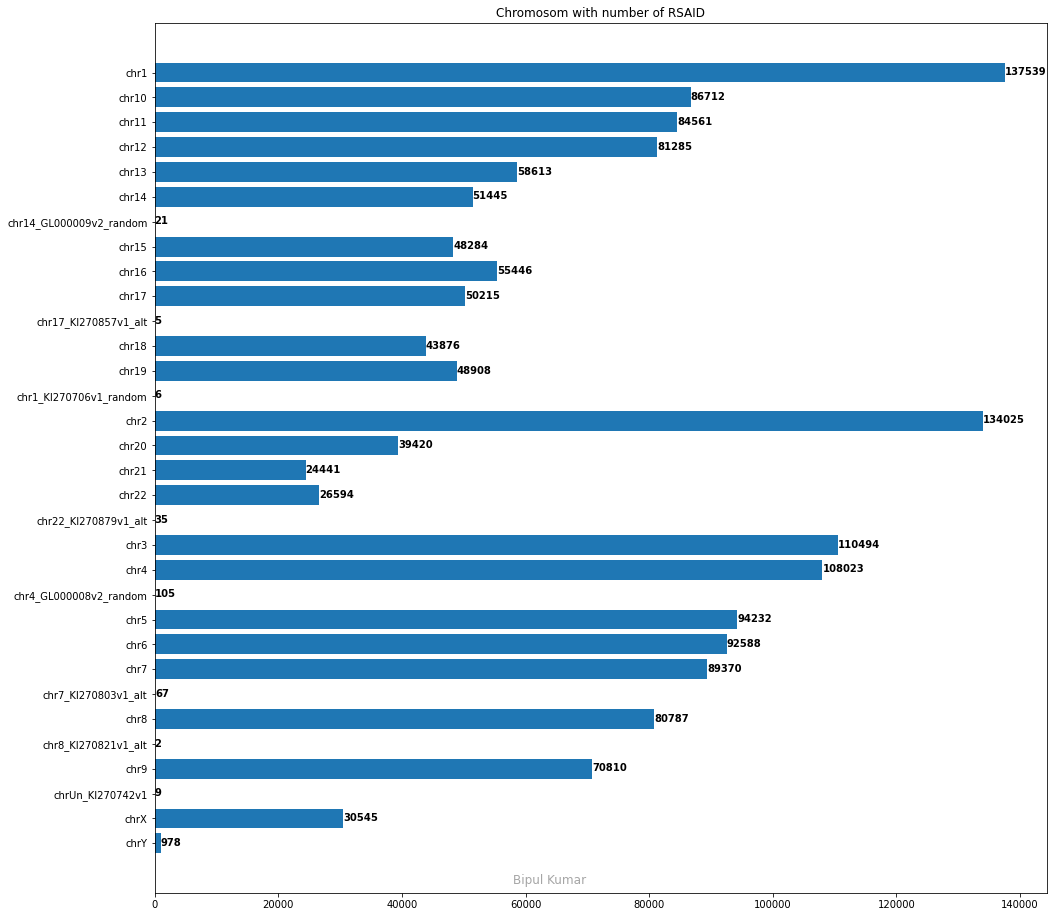

In [25]:
import mysql.connector as sql
import pandas as pd
import matplotlib.pyplot as plt
"""
Provide the number of rows with an RSID (column C and typically starts with RSxxxxxx) 
for each Chromosome (column A that starts with Chr1, 2.. etc.) Make pareto chart

SELECT COUNT(DISTINCT(ID)) as NO_RSID,CHROM FROM  MASTER_DATA GROUP BY CHROM; #NOT APPLIED
SELECT COUNT(ID) as NO_RSID,CHROM FROM  MASTER_DATA GROUP BY CHROM;

SELECT COUNT(DISTINCT(ID)) as NO_RSID, CHROM FROM  MASTER_DATA WHERE ID LIKE 'rs%' GROUP BY CHROM;;

"""
db_connection = sql.connect(host='localhost', database='sam', user='root', password='xxx', auth_plugin='mysql_native_password')
db_cursor = db_connection.cursor()
db_cursor.execute("SELECT COUNT(DISTINCT(ID)) as NO_RSID, CHROM FROM  MASTER_DATA WHERE ID LIKE 'rs%' GROUP BY CHROM;")

table_rows = db_cursor.fetchall()

df = pd.DataFrame(table_rows)
display(df)

#Ploting on pareto chart
CHROM = df[1]
RSID_COUNT = df[0]
 
# Figure Size
fig, ax = plt.subplots(figsize =(16,16))
 
# Horizontal Bar Plot
ax.barh(CHROM, RSID_COUNT)
 
# Show top values
ax.invert_yaxis()
 
# Add annotation to bars
for i in ax.patches:
    plt.text(i.get_width()+0.3, i.get_y()+0.5,
             str(round((i.get_width()), 2)),
             fontsize = 10, fontweight ='bold',
             color ='black')
    
    
# Add Plot Title
ax.set_title('Chromosom with number of RSID',
             loc ='center', )


# Add Text watermark
fig.text(0.5, 0.13, 'Bipul Kumar', fontsize = 12,
         color ='grey', ha ='right', va ='bottom',
         alpha = 0.7)

# Show Plot
plt.show()    

## 4. Answer
For each unique RSID (columns C from the master data that is created in step a.), give the count of the number of samples that have that unique RSID. We should be able to execute this file

In [24]:
import mysql.connector as sql
import pandas as pd

"""
For each unique RSID (columns C from the master data that is created in step a.),
give the count of the number of samples that have that unique RSID. We should be able to execute this file

SELECT COUNT(DISTINCT(ID)) AS TOTAL_UNIQ_RSID FROM master WHERE ID LIKE 'rs%';
"""
db_connection = sql.connect(host='localhost', database='sam', user='root', password='xxx', auth_plugin='mysql_native_password')
db_cursor = db_connection.cursor()
db_cursor.execute("SELECT COUNT(DISTINCT(ID)) AS TOTAL_UNIQ_RSID FROM master WHERE ID LIKE 'rs%';")

table_rows = db_cursor.fetchall()

df = pd.DataFrame(table_rows)
display(df)

,0
0,1649441
